In [5]:
import sys
sys.path.append('../')
sys.path.append('../rlkit_master/')

import pickle
from rlkit_master.rlkit.samplers.rollout_functions import rollout
from rlkit_master.rlkit.envs.wrappers import NormalizedBoxEnv
import torch
import seaborn as sns
from gym.envs.mujoco import HalfCheetahEnv

from bokeh.plotting import figure, show, output_file
from bokeh.plotting import output_notebook
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.client import push_session, pull_session

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider,TextInput
from bokeh.plotting import figure, show, ColumnDataSource
from scipy.stats import entropy
output_notebook()

import matplotlib.pyplot as plt
# import seaborn as sns

from scipy.fftpack import fft, fftfreq, fftshift
from skimage import util
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from math import sqrt

Loading BokehJS ...

In [6]:
eval_env = NormalizedBoxEnv(HalfCheetahEnv())

In [43]:
exp_name = 'name-of-experiment_2019_11_22_14_30_29_0000--s-0'
iter_num = 1480
# 'name-of-experiment_2020_01_10_23_16_20_0000--s-0'
agent = torch.load(f'../rlkit_master/data/name-of-experiment/{exp_name}/itr_{iter_num}.pkl')

In [44]:
agent = agent['trainer/policy']

In [45]:
rollout_dict = rollout(
        env = eval_env ,
        agent = agent,
        max_path_length=1000,
        render=False,
        render_kwargs=None,
)

In [60]:
act_num = 4

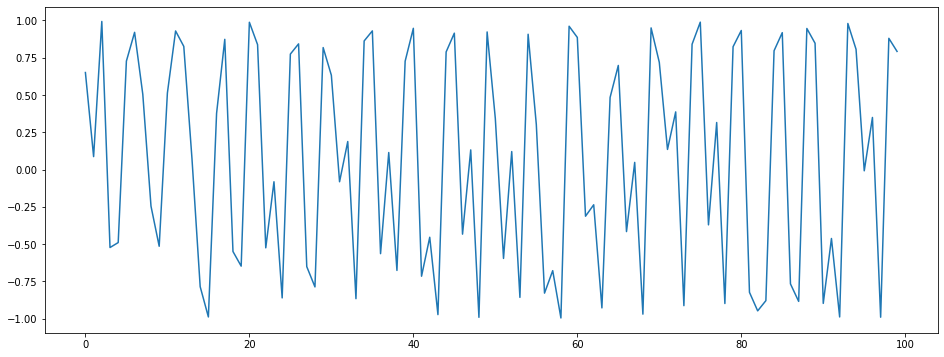

In [61]:
# plot actions
plt.figure(figsize=(16, 6))
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,0][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,1][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,2][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,3][:100])
ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,4][:100])
# ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['actions'][:,5][:100])

plt.show()

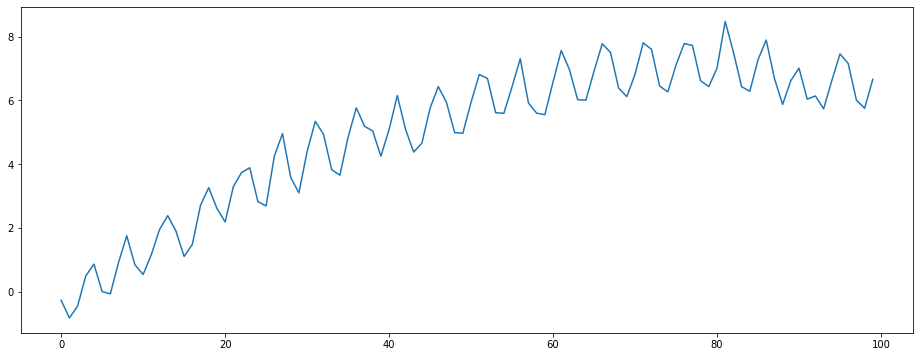

In [62]:
# plot rewards
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=[i for i in range(100)], y=rollout_dict['rewards'][:,0][:100])
plt.show()

In [63]:
# Fourie Transform Preparation
M = int(10*8)
slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
# remove DC
# slices -= np.mean(slices)
win = np.hanning(M + 1)[:-1]
# Window signal
# slices *= scipy.signal.windows.hann(len(slices))
slices = slices * win
spectrum = np.fft.rfft(slices.T, axis=0,norm = 'ortho')
# [:M // 2 + 1:-1]
spectrum = np.abs(spectrum)
spectrum.shape

y = spectrum.mean(axis = 1)

<Figure size 432x288 with 0 Axes>

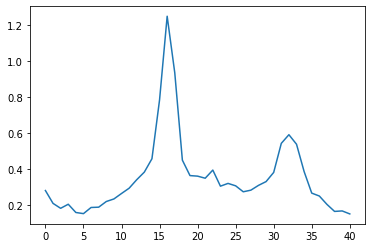

<Figure size 432x288 with 0 Axes>

In [64]:
# Fourier Transform
fft = np.fft.rfft(spectrum, norm="ortho")


plt.plot(spectrum.mean(axis =1))
plt.figure()

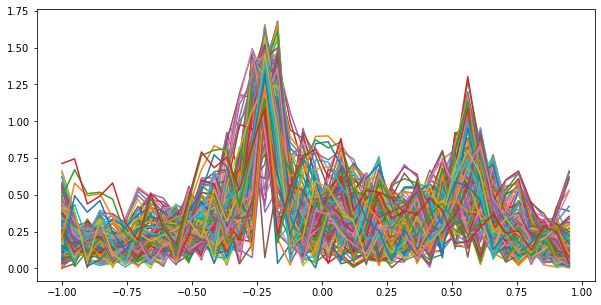

In [65]:
# Plot Spectrum
spectrum_shift = np.fft.fftshift(np.abs(y))
fig,ax = plt.subplots(1,1,figsize=(10,5))
# ax[0].plot(xf,light_intensity())
x1 = -1
x2 = 1
xf = np.arange(x1,x2,1/20.5)
ax.plot(xf,spectrum)
# ax.set_xlim(-0.05,0.05)
plt.show()

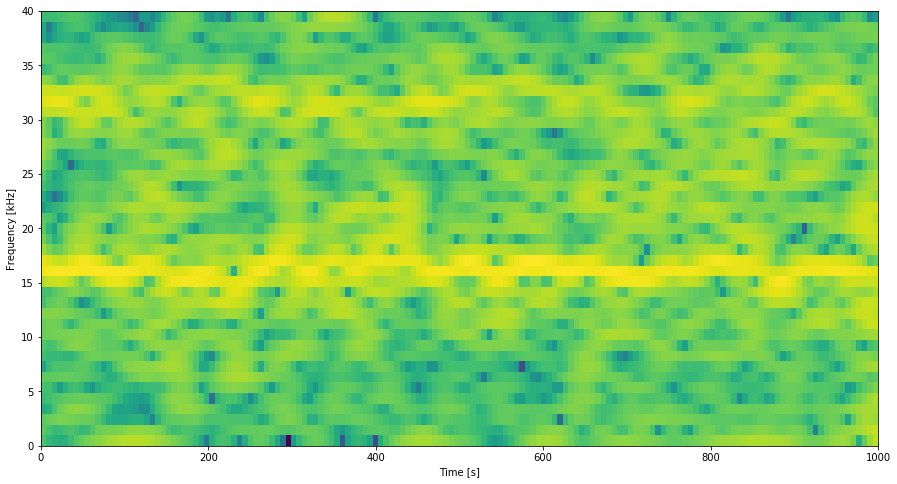

In [66]:
# Plot SPectrum
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [17]:
# Plot Spectrum for each of 100 epochs

# act_num = 5
# for i in range(0,100):
#     if np.mod(i,10) == 0:
#         print(i)
#         agent = torch.load(f'../rlkit_master/data/name-of-experiment/{exp_name}/itr_{i}.pkl')
#         agent = agent['trainer/policy']
        
#         rollout_dict = rollout(
#         env = eval_env ,
#         agent = agent,
#         max_path_length=1000,
#         render=False,
#         render_kwargs=None,
#             )
        
#         M = int(10*8)
#         slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
        
#         win = np.hanning(M + 1)[:-1]
#         slices = slices * win
        
#         spectrum = np.fft.rfft(slices.T, axis=0)
#         spectrum = np.abs(spectrum)
        
#         y = spectrum.mean(axis = 1)
        
#         scaler = MinMaxScaler()
#         y = scaler.fit_transform(y.reshape(-1, 1))
        
        
        
#         spectrum_shift = np.fft.fftshift(np.abs(y))
#         fig,ax = plt.subplots(1,1,figsize=(10,5))
#         # ax[0].plot(xf,light_intensity())
#         x1 = -1
#         x2 = 1
#         xf = np.arange(x1,x2,1/20.5)
#         ax.plot(xf,spectrum_shift)
#         # ax.set_xlim(-0.05,0.05)
#         plt.show()
        

In [18]:
def get_action_mean_ft_spectrum_from_epoch(act_num,epoch_num):
    agent = torch.load(f'../rlkit_master/data/name-of-experiment/{exp_name}/itr_{epoch_num}.pkl')
    agent = agent['trainer/policy']

    rollout_dict = rollout(
    env = eval_env ,
    agent = agent,
    max_path_length=1000,
    render=False,
    render_kwargs=None,
        )

    M = int(10*8)
    slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
    # remove DC
    slices -= np.mean(slices)
    
    win = np.hanning(M + 1)[:-1]
    slices = slices * win

    spectrum = np.fft.rfft(slices.T, axis=0, norm="ortho")
    return (np.abs(spectrum).mean(axis = 1))

In [19]:

# Plot sliders for FOurier Spectrum per action per epoch

act_num = 5
x1 = 0
x2 = 41
x = np.arange(x1,x2)

# x = np.linspace(0, 10, 500)
max_steps = 2990
y_dict ={}
for act in range(6):
    for epoch in range(0,max_steps,10):
        y_dict[f'{act}_{epoch}'] = get_action_mean_ft_spectrum_from_epoch(act,epoch)
y_dict["y"] = y_dict['0_0']

y_dict['x'] = x

source = ColumnDataSource(data= y_dict)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

epoch_slider = Slider(start=0, end=max_steps+1, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, epoch=epoch_slider,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const E = epoch.value;
    const x = data['x'];
    const y = data[A.toString().concat('_',E.toString())];
    data['y'] = y;
    
    
    source.change.emit();
""")

epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(epoch_slider, act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)

In [77]:
# Plot slider per action of max Fourier values with epochs on x axes
preiods = {}
for act in range(6):
    act_period = []
    for epoch in range(0,max_steps,10):
        act_period.append(80/max(np.argmax(y_dict[f'{act}_{epoch}']),1))
    
    preiods[f'{act}'] = act_period
preiods["y"] = preiods['0']

preiods['x'] = [i for i  in range(0,2991,10)]

source = ColumnDataSource(data= preiods)

plot = figure(y_range=(2, 9), plot_width=400, plot_height=400,
             x_axis_label="Epoch num",
           y_axis_label="Period length")

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# epoch_slider = Slider(start=0, end=2991, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const x = data['x'];
    const y = data[A.toString()];
    data['y'] = y;
    
    
    source.change.emit();
""")

# epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column( act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)


In [68]:
80/max(np.argmax(y_dict[f'{4}_{1480}']),1)

5.0

In [72]:
len(y_dict[f'{4}_{1480}'])

41

In [73]:
np.argmax(y_dict[f'{4}_{1480}'][25:])

6

In [75]:
80/31

2.5806451612903225

In [81]:
# max pick amplitude how big

max_pick = {}
for act in range(6):
    act_period_max = []
    act_period_entropy = []
    for epoch in range(0,max_steps,10):
        act_period_max.append(np.max( y_dict[f'{act}_{epoch}']))
        act_period_entropy.append(entropy(y_dict[f'{act}_{epoch}']))
    
    max_pick[f'{act}'] = act_period_max

max_pick["y"] = max_pick['0']

max_pick['x'] = [i for i  in range(0,2991,10)]

source = ColumnDataSource(data= max_pick)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400,
              x_axis_label = 'epoch',y_axis_label = 'spike magnitude')

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")


callback = CustomJS(args=dict(source=source,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const x = data['x'];
    const y = data[A.toString()];
    data['y'] = y;
    
    
    source.change.emit();
""")

# epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column( act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)
    

In [103]:
from sklearn.preprocessing import MinMaxScaler

# Entropy (CUrrently wo normalization)
max_pick = {}
for act in range(6):
    act_period_max = []
    act_period_entropy = []
    for epoch in range(0,max_steps,10):
        scaler = MinMaxScaler()
#         act_period_max.append(np.max( y_dict[f'{act}_{epoch}']))
#         print((np.array(y_dict[f'{act}_{epoch}']).reshape(1,-1)))    
#         print(scaler.fit_transform(np.array(y_dict[f'{act}_{epoch}']).reshape(-1,1)))
        act_period_entropy.append(entropy( scaler.fit_transform(np.array(y_dict[f'{act}_{epoch}']).reshape(-1,1))))
    
    max_pick[f'{act}'] = act_period_entropy

max_pick["y"] = max_pick['0']

max_pick['x'] = [i for i  in range(0,2991,10)]

source = ColumnDataSource(data= max_pick)

plot = figure( plot_width=400, plot_height=400,
              x_axis_label = 'epoch',y_axis_label = 'ftt amplitude entropy')

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# epoch_slider = Slider(start=0, end=2991, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const x = data['x'];
    const y = data[A.toString()];
    data['y'] = y;
    
    
    source.change.emit();
""")

# epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column( act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)
    

In [99]:
scaler = MinMaxScaler()
scaler.fit_transform(np.array([0.26932745 ,0.28179524, 0.27054951 ,0.3227007 , 0.36734882, 0.33865721,
  0.26810299,0.28364696, 0.2806993  ,0.3201005 , 0.31224287, 0.33674991,
  0.38804725,0.32206106, 0.30600577 ,0.32885417, 0.24337577, 0.26203727,
  0.2884126 ,0.31650231, 0.30824555 ,0.33648946, 0.36005954, 0.29765611,
  0.32088902,0.35874517, 0.32863635 ,0.33667052, 0.31721753, 0.32100652,
  0.27295651,0.27378233, 0.29829003 ,0.34160555, 0.36703701, 0.32626051,
  0.3151952 ,0.32004813, 0.29910723 ,0.32992021, 0.31559739]).reshape(-1, 1))

array([[0.17938352],
       [0.26556354],
       [0.18783066],
       [0.54831077],
       [0.85692806],
       [0.65860555],
       [0.1709198 ],
       [0.27836302],
       [0.25798817],
       [0.53033763],
       [0.47602402],
       [0.64542189],
       [1.        ],
       [0.54388944],
       [0.43291186],
       [0.59084486],
       [0.        ],
       [0.12899225],
       [0.31130414],
       [0.50546618],
       [0.4483937 ],
       [0.6436216 ],
       [0.806543  ],
       [0.37519724],
       [0.53578805],
       [0.7974578 ],
       [0.58933924],
       [0.64487313],
       [0.51040993],
       [0.53660023],
       [0.20446836],
       [0.2101766 ],
       [0.37957903],
       [0.6789851 ],
       [0.85477276],
       [0.57291693],
       [0.49643116],
       [0.52997564],
       [0.38522769],
       [0.59821355],
       [0.49921118]])